<a href="https://colab.research.google.com/github/ecmbuijsman/TM10007_ML/blob/main/gist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM10007 Assignment template

In [4]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git
!pip install scikit-plot

  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data loading and cleaning

The dataset is loaded and checked for the number of samples and columns (features).

In [5]:
import pandas as pd

# Load data 
!git clone https://github.com/jveenland/tm10007_ml.git
data = pd.read_csv('/content/tm10007_ml/worcgist/GIST_radiomicFeatures.csv')

data = data.drop(['ID'],axis=1)

# Print number of samples and columns
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

Cloning into 'tm10007_ml'...
remote: Enumerating objects: 83, done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 83
Unpacking objects: 100% (83/83), 67.99 MiB | 9.80 MiB/s, done.
The number of samples: 246
The number of columns: 494


## Data orientation

In this part, data orientation is performed by looking at the samples, feature names, feature datatypes, amount of data and check whether there are missing data.

In [6]:
# Visualising some of the samples
data.head()

,label,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
0,GIST,0.797427,0.120594,80.192445,9.445741,7.102210,3.876595,0.927623,0.081385,0.015227,...,0.0,0.032461,7.353902,63.183181,0.0,0,0.123189,1591.133826,0.0,15.687095
1,non-GIST,0.896991,0.045854,35.323607,2.781343,5.339906,1.923100,0.975762,0.017550,0.009118,...,0.0,0.043431,6.452863,52.634005,0.0,0,0.172040,220.543010,0.0,12.664845
2,GIST,0.893238,0.051894,17.582541,1.864908,7.622507,1.039745,0.979608,0.017926,0.013258,...,0.0,0.068175,3.849719,16.277217,0.0,0,0.286710,62.150817,0.0,10.432943
3,non-GIST,0.914027,0.032078,21.951056,2.188093,4.757274,1.786309,0.981125,0.013734,0.011338,...,0.0,0.044148,5.725807,38.600415,0.0,0,0.182812,39.375540,0.0,10.194878
4,non-GIST,0.659747,0.266226,20.801224,4.025831,14.404912,7.695865,0.865275,0.171213,0.048078,...,0.0,0.043369,4.546357,23.831176,0.0,0,0.183349,24.192700,0.0,10.066832


In [7]:
# Printing datatypes for each feature
data.dtypes

label                                                      object
PREDICT_original_sf_compactness_avg_2.5D                  float64
PREDICT_original_sf_compactness_std_2.5D                  float64
PREDICT_original_sf_rad_dist_avg_2.5D                     float64
PREDICT_original_sf_rad_dist_std_2.5D                     float64
                                                           ...   
PREDICT_original_phasef_phasesym_peak_position_WL3_N5       int64
PREDICT_original_phasef_phasesym_range_WL3_N5             float64
PREDICT_original_phasef_phasesym_energy_WL3_N5            float64
PREDICT_original_phasef_phasesym_quartile_range_WL3_N5    float64
PREDICT_original_phasef_phasesym_entropy_WL3_N5           float64
Length: 494, dtype: object

In [8]:
# Printing feature names
data.columns

Index(['label', 'PREDICT_original_sf_compactness_avg_2.5D',
       'PREDICT_original_sf_compactness_std_2.5D',
       'PREDICT_original_sf_rad_dist_avg_2.5D',
       'PREDICT_original_sf_rad_dist_std_2.5D',
       'PREDICT_original_sf_roughness_avg_2.5D',
       'PREDICT_original_sf_roughness_std_2.5D',
       'PREDICT_original_sf_convexity_avg_2.5D',
       'PREDICT_original_sf_convexity_std_2.5D',
       'PREDICT_original_sf_cvar_avg_2.5D',
       ...
       'PREDICT_original_phasef_phasesym_median_WL3_N5',
       'PREDICT_original_phasef_phasesym_std_WL3_N5',
       'PREDICT_original_phasef_phasesym_skewness_WL3_N5',
       'PREDICT_original_phasef_phasesym_kurtosis_WL3_N5',
       'PREDICT_original_phasef_phasesym_peak_WL3_N5',
       'PREDICT_original_phasef_phasesym_peak_position_WL3_N5',
       'PREDICT_original_phasef_phasesym_range_WL3_N5',
       'PREDICT_original_phasef_phasesym_energy_WL3_N5',
       'PREDICT_original_phasef_phasesym_quartile_range_WL3_N5',
       'PREDICT_

In [9]:
# Printing number of samples
print("The number of samples in the dataset is", len(data))

# Printing number of features
print("The number of features in the dataset is", len(data.columns))

# Printing number of GISTs
print("The number of GISTs in the dataset is", len(data[data.label=='GIST']))

# Printing number of non-GISTs
print("The number of non-GISTs in the dataset is", len(data[data.label=='non-GIST']))

The number of samples in the dataset is 246
The number of features in the dataset is 494
The number of GISTs in the dataset is 125
The number of non-GISTs in the dataset is 121


In [10]:
# Check for NaNs
data.isnull().values.any()

# Checking where the NaNs would be
data.isnull().sum()

label                                                     0
PREDICT_original_sf_compactness_avg_2.5D                  0
PREDICT_original_sf_compactness_std_2.5D                  0
PREDICT_original_sf_rad_dist_avg_2.5D                     0
PREDICT_original_sf_rad_dist_std_2.5D                     0
                                                         ..
PREDICT_original_phasef_phasesym_peak_position_WL3_N5     0
PREDICT_original_phasef_phasesym_range_WL3_N5             0
PREDICT_original_phasef_phasesym_energy_WL3_N5            0
PREDICT_original_phasef_phasesym_quartile_range_WL3_N5    0
PREDICT_original_phasef_phasesym_entropy_WL3_N5           0
Length: 494, dtype: int64

## Test & Train-Validation split

The dataset is split in a test set and a train set in a 20:80 ratio, in line with literature cited in the report.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Split data in features and label
y = data['label'] # GIST/non-GIST
X = data.drop(['label'], axis=1) # feature values

# Test-train split (0.2-0.8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature normalization

Standardize features by removing the mean and scaling to unit variance using StandardScaler from sklearn.

In [12]:
from sklearn import preprocessing

# Standard scaler from sklearn, fitted on train data
scaler = preprocessing.StandardScaler().fit(X_train)

# Applying scaler to train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Feature selection - principal component analysis (PCA)

First, we plot the 2D PCA projection to see whether a 2D feature space would allow clear distinction between groups (since then, a simple classifier could be an option). Next, we determine the number of principal components based on the variance plot.

<Axes: title={'center': 'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

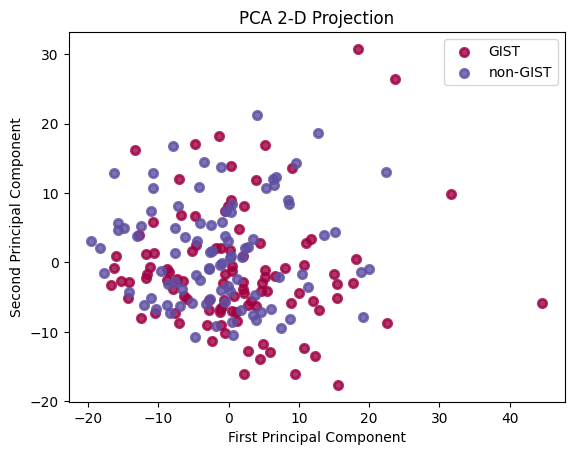

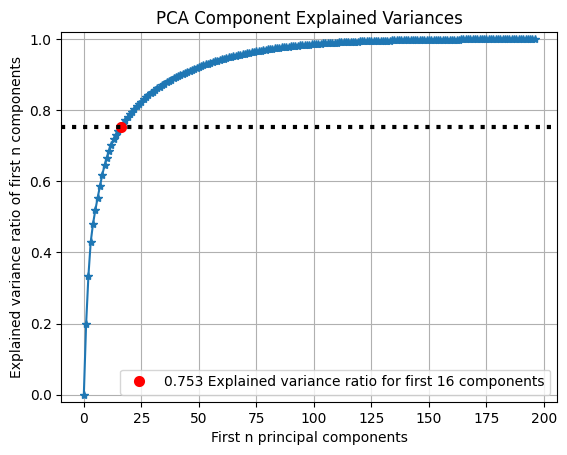

In [13]:
from sklearn.decomposition import PCA
import scikitplot as skplt

# Performing PCA
pca = PCA(random_state=1)
pca.fit(X_train_scaled)

# Plotting 2D projection and component variance graph
skplt.decomposition.plot_pca_2d_projection(pca, X_train_scaled, y_train)
skplt.decomposition.plot_pca_component_variance(pca)

In [14]:
from sklearn.decomposition import PCA

# Performing PCA with 0.753 (result of the figure above)
pca = PCA(0.753,random_state=1)

# Fitting the PCA to the train set
X_pca = pca.fit(X_train_scaled)

# Applying PCA to both train and test set
train_pca = X_pca.transform(X_train_scaled)
test_pca = X_pca.transform(X_test_scaled)

## Classifiers

### Support vector machine (SVM)

In this subsection, a support vector machine (SVM) is performed on the train set. First, a default SVM model is built. Hyperparameter tuning is performed using a "random grid" dictionary with values for C, gamma, kernel and for the poly kernel, different values for degree and coef0 are checked as well. 500 iterations are performed within this random grid, the best hyperparameters are printed according to the accuracy. 5-fold cross-validation is applied.

In [15]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

svm_random_grid = {'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'scale','auto'],
                'kernel': ['rbf','linear','poly'],
                'degree': [1, 3, 5],
                'coef0': [0, 0.01, 0.5, 1]}

# Define random search
svm = svm.SVC()
svm_search = RandomizedSearchCV(svm, svm_random_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5, random_state=0)

# Fit grid search
svm_search.fit(train_pca,y_train)

# Best hyperparameters and their accuracy
print('Best hyperparameters: ' + str(svm_search.best_params_))
print('Best accuracy score: ' + str(svm_search.best_score_))

KeyboardInterrupt: ignored

### Random Forest (RF)

In this subsection, random forest (RF) is performed on the train set. Hyperparameter tuning is performed using a "random grid" dictionary with values for n_estimators, max_depth, min_samples_split, min_samples_leaf and bootstrap. 500 iterations are performed within this random grid, the best hyperparameters are printed according to the accuracy. 5-fold cross-validation is applied.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # randomised search function
from sklearn.ensemble import RandomForestClassifier # random forest classifier

# Create the random grid
rf_random_grid = {'n_estimators': range(10,1001,10),
                'max_depth': range(10,101,10),
                'min_samples_split': range(2,11),
                'min_samples_leaf': range(1,11),
                }

# Performing randomised search
rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf, rf_random_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5, random_state=0)
rf_search.fit(train_pca,y_train)


# Best hyperparameters and their accuracy
print('Best hyperparameters: ' + str(rf_search.best_params_))
print('Best accuracy score: ' + str(rf_search.best_score_))

### Neural networks (NN)

In this subsection, neural networks (NN) is performed on the train set. Hyperparameter tuning is performed using a "random grid" dictionary with values for hidden_layer_sizes, learning_rate_init, alpha, solver and early_stopping. 500 iterations are performed within this random grid, the best hyperparameters are printed according to the accuracy. 5-fold cross-validation is applied.

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning) # ignores convergence warnings

# Create the hidden layer size variable
hidden_layer_size = []

for a in range(5,100,10):
    for b in range(5,100,10):
        hidden_layer_size.append((a,b))

# Create the random grid
mlp_random_grid = {'hidden_layer_sizes': hidden_layer_size,
                   'activation': ['identity', 'logistic', 'tanh', 'relu'],
                   'solver': ['lbfgs', 'sgd','adam'],
                   'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
                   'learning_rate': ['constant', 'invscaling','adaptive'],
                   'max_iter': range(100,1001,100)         
               }
# Performing randomised search
mlp = MLPClassifier()
mlp_search = RandomizedSearchCV(mlp, mlp_random_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=5,random_state=0)
mlp_search.fit(train_pca,y_train)

# Best hyperparameters and their accuracy
print('Best hyperparameters: ' + str(mlp_search.best_params_))
print('Best accuracy score: ' + str(mlp_search.best_score_))

KeyboardInterrupt: ignored

## Performance

For each classifier, the accuracy, f1 value, recall/sensitivity and precision are calculated in a five-fold crossvalidation of the train set. 

### Support vector machine

In [16]:
from sklearn import svm # support vector classifier
from sklearn.model_selection import cross_val_score

# Support vector machine with best hyperparameters
svm_model = svm.SVC(kernel='poly', gamma=0.01, degree=3, coef0=0.01, C=0.1, random_state=0)

# Perform 5-fold cross-validation and calculate metrics for each fold
svm_accuracy_scores = cross_val_score(svm_model, train_pca, y_train, cv=5, scoring='accuracy')
svm_f1_scores = cross_val_score(svm_model, train_pca, y_train, cv=5, scoring='f1_macro')
svm_recall_scores = cross_val_score(svm_model, train_pca, y_train, cv=5, scoring='recall_macro')
svm_precision_scores = cross_val_score(svm_model, train_pca, y_train, cv=5, scoring='precision_macro')

### Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.model_selection import cross_val_score

# Random forest with best hyperparameters
rf_model = RandomForestClassifier(n_estimators=940,max_depth=10,min_samples_split=2,min_samples_leaf=1,random_state=0)

# Perform 5-fold cross-validation and calculate metrics for each fold
rf_accuracy_scores = cross_val_score(rf_model, train_pca, y_train, cv=5, scoring='accuracy')
rf_f1_scores = cross_val_score(rf_model, train_pca, y_train, cv=5, scoring='f1_macro')
rf_recall_scores = cross_val_score(rf_model, train_pca, y_train, cv=5, scoring='recall_macro')
rf_precision_scores = cross_val_score(rf_model, train_pca, y_train, cv=5, scoring='precision_macro')

### Neural networks

In [18]:
from sklearn.neural_network import MLPClassifier # multilayer perceptron classifier
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning) # ignore convergence warnings

# Neural networks with best hyperparameters
mlp_model = MLPClassifier(solver='adam',max_iter=600,learning_rate='constant',hidden_layer_sizes=(15,95),alpha=0.01,activation='logistic',random_state=0)

# Perform 5-fold cross-validation and calculate metrics for each fold
mlp_accuracy_scores = cross_val_score(mlp_model, train_pca, y_train, cv=5, scoring='accuracy')
mlp_f1_scores = cross_val_score(mlp_model, train_pca, y_train, cv=5, scoring='f1_macro')
mlp_recall_scores = cross_val_score(mlp_model, train_pca, y_train, cv=5, scoring='recall_macro')
mlp_precision_scores = cross_val_score(mlp_model, train_pca, y_train, cv=5, scoring='precision_macro')

### Table with scores

All values are put in one table for easy comparison.

In [19]:
from tabulate import tabulate
from numpy import mean
from numpy import std

# Generate table with performance of all classifiers
table = [['Accuracy', '%.2f%% (+/- %.2f%%)' % (mean(svm_accuracy_scores)*100, std(svm_accuracy_scores)*100), 
          '%.2f%% (+/- %.2f%%)' % (mean(rf_accuracy_scores)*100, std(rf_accuracy_scores)*100),
          '%.2f%% (+/- %.2f%%)' % (mean(mlp_accuracy_scores)*100, std(mlp_accuracy_scores)*100)],
          ['F1-score', 
           '%.2f%% (+/- %.2f%%)' % (mean(svm_f1_scores)*100, std(svm_f1_scores)*100),
           '%.2f%% (+/- %.2f%%)' % (mean(rf_f1_scores)*100, std(rf_f1_scores)*100), 
           '%.2f%% (+/- %.2f%%)' % (mean(mlp_f1_scores)*100, std(mlp_f1_scores)*100)], 
           ['Precision', 
            '%.2f%% (+/- %.2f%%)' % (mean(svm_precision_scores)*100, std(svm_precision_scores)*100), 
            '%.2f%% (+/- %.2f%%)' % (mean(rf_precision_scores)*100, std(rf_precision_scores)*100), 
            '%.2f%% (+/- %.2f%%)' % (mean(mlp_precision_scores)*100, std(mlp_precision_scores)*100)],
            ['Sensitivity', 
             '%.2f%% (+/- %.2f%%)' % (mean(svm_recall_scores)*100, std(svm_recall_scores)*100), 
             '%.2f%% (+/- %.2f%%)' % (mean(rf_recall_scores)*100, std(rf_recall_scores)*100), 
             '%.2f%% (+/- %.2f%%)' % (mean(mlp_recall_scores)*100, std(mlp_recall_scores)*100)]]
print(tabulate(table,headers=['SVM','RF','NN']))

             SVM                 RF                  NN
-----------  ------------------  ------------------  ------------------
Accuracy     62.27% (+/- 6.98%)  59.74% (+/- 5.94%)  51.55% (+/- 6.08%)
F1-score     59.55% (+/- 8.20%)  58.61% (+/- 6.18%)  50.67% (+/- 6.83%)
Precision    63.17% (+/- 6.76%)  60.16% (+/- 6.49%)  50.80% (+/- 6.78%)
Sensitivity  61.15% (+/- 7.23%)  59.28% (+/- 6.12%)  51.03% (+/- 6.35%)


### Test scores
For the chosen classifier (support vector machine) the scores on the test set are calculated and the ROC is plotted.

Accuracy score on the test set: 0.6
F1-score score on the test set: 0.63
Precision score on the test set: 0.52
Sensitivity score on the test set: 0.81
Specificity score on the test set: 0.45


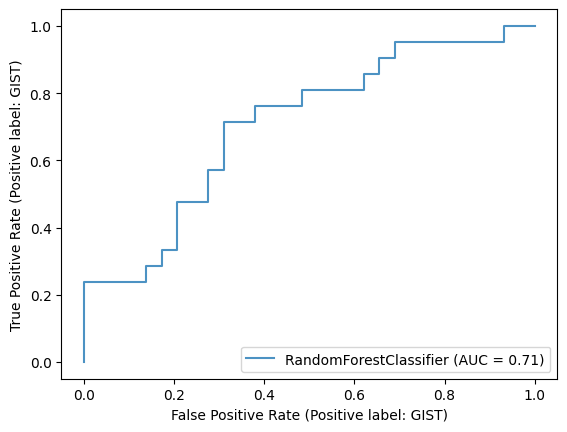

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

rf_model.fit(train_pca,y_train)
rf_prediction = rf_model.predict(test_pca)
rf_accuracy = round(accuracy_score(y_test, rf_prediction), 2)
print('Accuracy score on the test set: ' + str(rf_accuracy))
rf_f1 = round(f1_score(y_test, rf_prediction, pos_label='GIST'),2)
print('F1-score score on the test set: ' + str(rf_f1))
rf_precision = round(precision_score(y_test, rf_prediction, pos_label='GIST'),2)
print('Precision score on the test set: ' +str(rf_precision))

tp, fn, fp, tn = confusion_matrix(y_test,rf_prediction).ravel()
rf_sens = round(tp/(tp+fn),2)
print('Sensitivity score on the test set: ' +str(rf_sens))
rf_spec = round(tn/(tn+fp),2)
print('Specificity score on the test set: ' +str(rf_spec))

ax = plt.gca()
rf_roc = RocCurveDisplay.from_estimator(rf_model, test_pca, y_test, ax=ax, alpha=0.8,pos_label='GIST')